In [169]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
from scipy.io import loadmat
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [161]:
carstrain_folder = "data/cars_train/"
car_annotations_path = "data/devkit/cars_train_annos.mat"
car_metadata_path = "data/devkit/cars_meta.mat"

#Loading the Dataset

annotations = loadmat(car_annotations_path)
meta = loadmat(car_metadata_path)
meta = np.concatenate(meta["class_names"][0])

dataset = []
columns = ["x1", "y1", "x2", "y2", "class ID", "Model","Image name"]
for example in annotations["annotations"][0]:
    
    filename = example[-1][0]
    annos = np.concatenate(list(example)[:-1]).ravel().tolist()
    carmodel = meta[example[-2][0] - 1][0]
    dataset.append(annos + [carmodel] + [filename])

dataset = pd.DataFrame(dataset, columns=columns)

In [167]:
dataset.head()

x1   y1    x2    y2  class ID                                Model  \
0   39  116   569   375        14                  Audi TTS Coupe 2012   
1   36  116   868   587         3                  Acura TL Sedan 2012   
2   85  109   601   381        91           Dodge Dakota Club Cab 2007   
3  621  393  1484  1096       134     Hyundai Sonata Hybrid Sedan 2012   
4   14   36   133    99       106  Ford F-450 Super Duty Crew Cab 2012   

  Image name  
0  00001.jpg  
1  00002.jpg  
2  00003.jpg  
3  00004.jpg  
4  00005.jpg

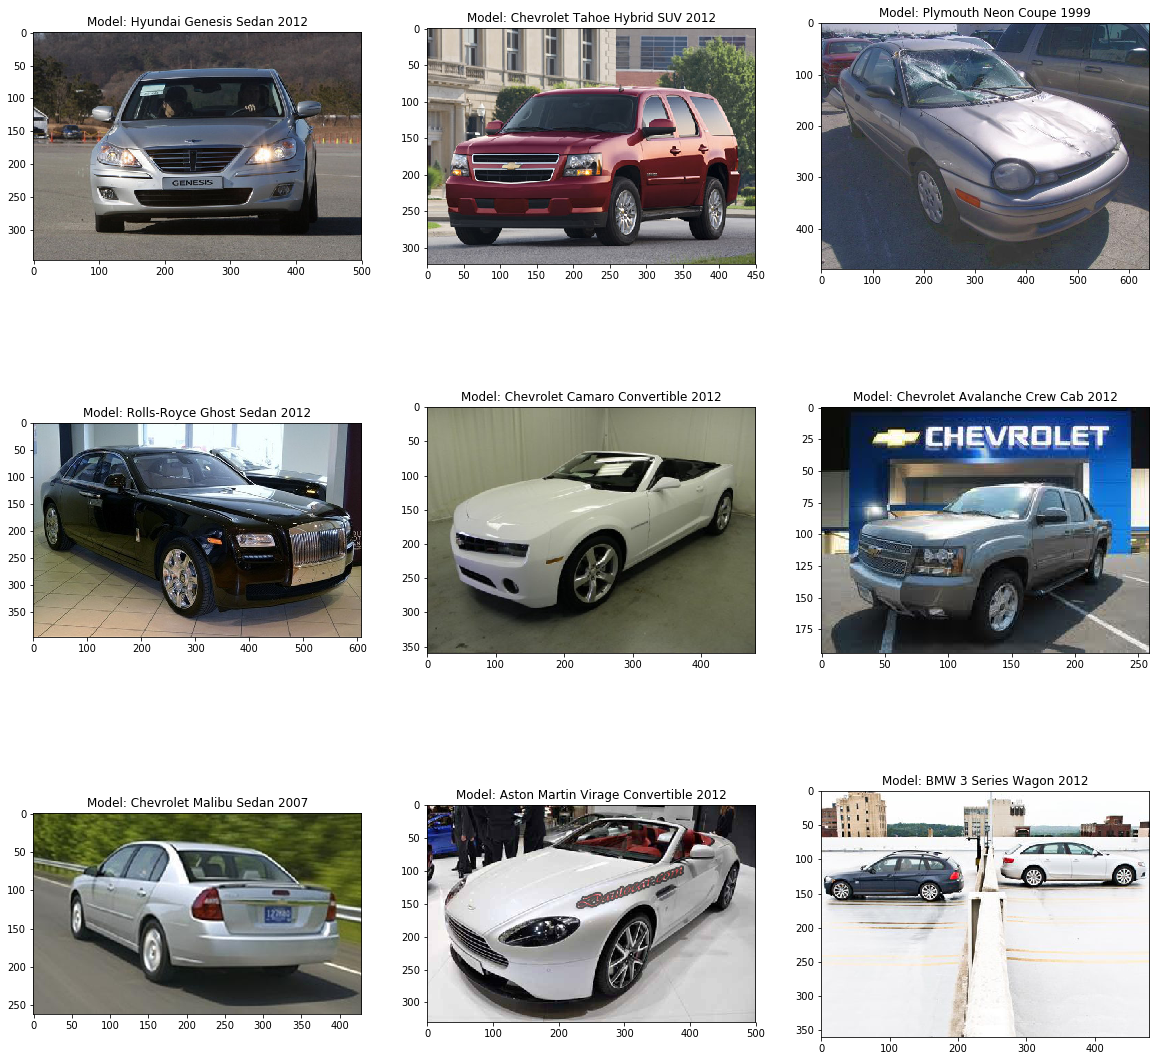

In [181]:
#Quick Sanity Check

#plot some images
fig = plt.figure(figsize=(20,20))
for i in range(1,10):
    plt.subplot(3,3,i)
    
    idx = random.randint(0, annotations["annotations"].shape[1]-1)
    image = mpimg.imread(os.path.join(carstrain_folder, dataset.iloc[idx]["Image name"]))
    plt.imshow(image)
    plt.title("Model: {}".format(dataset.iloc[idx]["Model"]))


plt.show()

In [185]:
g=dataset["Model"].value_counts()

In [ ]:
#Visualize the Different 

In [203]:
make = []
model = []
year = []
for car in dataset["Model"].values:
    make.append(car.split()[0])
    model.append(" ".join(car.split()[1:-1]))
    year.append(car.split()[-1])

In [204]:
dataset["model"] = model
dataset["make"] = make
dataset["year"] = year

In [210]:
dataset.year.value_counts()

2012    4818
2007    1059
2009     540
2010     413
2011     312
2008     283
1993     139
1994     128
1998      92
2001      90
1991      46
2006      46
2002      45
2000      45
1999      44
1997      44
Name: year, dtype: int64

In [90]:
g=[examples for examples in annotations["annotations"][0]]

(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9'))
[39, 116, 569, 375, 14]
(array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9'))
[36, 116, 868, 587, 3]
(array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9'))
[85, 109, 601, 381, 91]
(array([[621]], dtype=uint16), array([[393]], dtype=uint16), array([[1484]], dtype=uint16), array([[1096]], dtype=uint16), array([[134]], dtype=uint8), array(['00004.jpg'], dtype='<U9'))
[621, 393, 1484, 1096, 134]
(array([[14]], dtype=uint8), array([[36]], dtype=uint8), array([[133]], dtype=uint8), array([[99]], dtype=uint8), array([[106]], dtype=uint8), array(['00005.jpg'], dtype='<

(array([[39]], dtype=uint8), array([[5]], dtype=uint8), array([[234]], dtype=uint8), array([[174]], dtype=uint8), array([[56]], dtype=uint8), array(['00339.jpg'], dtype='<U9'))
[39, 5, 234, 174, 56]
(array([[139]], dtype=uint8), array([[152]], dtype=uint8), array([[488]], dtype=uint16), array([[305]], dtype=uint16), array([[9]], dtype=uint8), array(['00340.jpg'], dtype='<U9'))
[139, 152, 488, 305, 9]
(array([[62]], dtype=uint8), array([[116]], dtype=uint8), array([[974]], dtype=uint16), array([[610]], dtype=uint16), array([[67]], dtype=uint8), array(['00341.jpg'], dtype='<U9'))
[62, 116, 974, 610, 67]
(array([[152]], dtype=uint8), array([[195]], dtype=uint8), array([[502]], dtype=uint16), array([[436]], dtype=uint16), array([[169]], dtype=uint8), array(['00342.jpg'], dtype='<U9'))
[152, 195, 502, 436, 169]
(array([[63]], dtype=uint8), array([[36]], dtype=uint8), array([[760]], dtype=uint16), array([[504]], dtype=uint16), array([[147]], dtype=uint8), array(['00343.jpg'], dtype='<U9'))
[

(array([[190]], dtype=uint8), array([[229]], dtype=uint8), array([[681]], dtype=uint16), array([[454]], dtype=uint16), array([[101]], dtype=uint8), array(['00679.jpg'], dtype='<U9'))
[190, 229, 681, 454, 101]
(array([[59]], dtype=uint8), array([[52]], dtype=uint8), array([[247]], dtype=uint8), array([[155]], dtype=uint8), array([[136]], dtype=uint8), array(['00680.jpg'], dtype='<U9'))
[59, 52, 247, 155, 136]
(array([[5]], dtype=uint8), array([[32]], dtype=uint8), array([[588]], dtype=uint16), array([[340]], dtype=uint16), array([[20]], dtype=uint8), array(['00681.jpg'], dtype='<U9'))
[5, 32, 588, 340, 20]
(array([[11]], dtype=uint8), array([[15]], dtype=uint8), array([[297]], dtype=uint16), array([[201]], dtype=uint8), array([[90]], dtype=uint8), array(['00682.jpg'], dtype='<U9'))
[11, 15, 297, 201, 90]
(array([[108]], dtype=uint8), array([[1]], dtype=uint8), array([[550]], dtype=uint16), array([[295]], dtype=uint16), array([[185]], dtype=uint8), array(['00683.jpg'], dtype='<U9'))
[108

(array([[45]], dtype=uint8), array([[203]], dtype=uint8), array([[982]], dtype=uint16), array([[564]], dtype=uint16), array([[43]], dtype=uint8), array(['01008.jpg'], dtype='<U9'))
[45, 203, 982, 564, 43]
(array([[39]], dtype=uint8), array([[100]], dtype=uint8), array([[479]], dtype=uint16), array([[317]], dtype=uint16), array([[70]], dtype=uint8), array(['01009.jpg'], dtype='<U9'))
[39, 100, 479, 317, 70]
(array([[6]], dtype=uint8), array([[3]], dtype=uint8), array([[932]], dtype=uint16), array([[639]], dtype=uint16), array([[6]], dtype=uint8), array(['01010.jpg'], dtype='<U9'))
[6, 3, 932, 639, 6]
(array([[248]], dtype=uint8), array([[147]], dtype=uint8), array([[554]], dtype=uint16), array([[323]], dtype=uint16), array([[101]], dtype=uint8), array(['01011.jpg'], dtype='<U9'))
[248, 147, 554, 323, 101]
(array([[58]], dtype=uint8), array([[72]], dtype=uint8), array([[763]], dtype=uint16), array([[529]], dtype=uint16), array([[6]], dtype=uint8), array(['01012.jpg'], dtype='<U9'))
[58, 

[103, 205, 1330, 928, 12]
(array([[28]], dtype=uint8), array([[199]], dtype=uint8), array([[1005]], dtype=uint16), array([[673]], dtype=uint16), array([[20]], dtype=uint8), array(['01298.jpg'], dtype='<U9'))
[28, 199, 1005, 673, 20]
(array([[41]], dtype=uint8), array([[140]], dtype=uint8), array([[591]], dtype=uint16), array([[356]], dtype=uint16), array([[186]], dtype=uint8), array(['01299.jpg'], dtype='<U9'))
[41, 140, 591, 356, 186]
(array([[42]], dtype=uint8), array([[186]], dtype=uint8), array([[1788]], dtype=uint16), array([[1088]], dtype=uint16), array([[58]], dtype=uint8), array(['01300.jpg'], dtype='<U9'))
[42, 186, 1788, 1088, 58]
(array([[34]], dtype=uint8), array([[93]], dtype=uint8), array([[620]], dtype=uint16), array([[350]], dtype=uint16), array([[144]], dtype=uint8), array(['01301.jpg'], dtype='<U9'))
[34, 93, 620, 350, 144]
(array([[62]], dtype=uint8), array([[79]], dtype=uint8), array([[620]], dtype=uint16), array([[455]], dtype=uint16), array([[178]], dtype=uint8), 

(array([[35]], dtype=uint8), array([[120]], dtype=uint8), array([[605]], dtype=uint16), array([[413]], dtype=uint16), array([[15]], dtype=uint8), array(['01589.jpg'], dtype='<U9'))
[35, 120, 605, 413, 15]
(array([[35]], dtype=uint8), array([[147]], dtype=uint8), array([[665]], dtype=uint16), array([[360]], dtype=uint16), array([[187]], dtype=uint8), array(['01590.jpg'], dtype='<U9'))
[35, 147, 665, 360, 187]
(array([[41]], dtype=uint8), array([[60]], dtype=uint8), array([[216]], dtype=uint8), array([[158]], dtype=uint8), array([[18]], dtype=uint8), array(['01591.jpg'], dtype='<U9'))
[41, 60, 216, 158, 18]
(array([[73]], dtype=uint8), array([[105]], dtype=uint8), array([[282]], dtype=uint16), array([[256]], dtype=uint16), array([[146]], dtype=uint8), array(['01592.jpg'], dtype='<U9'))
[73, 105, 282, 256, 146]
(array([[48]], dtype=uint8), array([[55]], dtype=uint8), array([[744]], dtype=uint16), array([[559]], dtype=uint16), array([[38]], dtype=uint8), array(['01593.jpg'], dtype='<U9'))


(array([[8]], dtype=uint8), array([[3]], dtype=uint8), array([[135]], dtype=uint8), array([[86]], dtype=uint8), array([[1]], dtype=uint8), array(['01918.jpg'], dtype='<U9'))
[8, 3, 135, 86, 1]
(array([[26]], dtype=uint8), array([[133]], dtype=uint8), array([[618]], dtype=uint16), array([[347]], dtype=uint16), array([[36]], dtype=uint8), array(['01919.jpg'], dtype='<U9'))
[26, 133, 618, 347, 36]
(array([[118]], dtype=uint8), array([[8]], dtype=uint8), array([[790]], dtype=uint16), array([[598]], dtype=uint16), array([[116]], dtype=uint8), array(['01920.jpg'], dtype='<U9'))
[118, 8, 790, 598, 116]
(array([[28]], dtype=uint8), array([[86]], dtype=uint8), array([[345]], dtype=uint16), array([[215]], dtype=uint8), array([[70]], dtype=uint8), array(['01921.jpg'], dtype='<U9'))
[28, 86, 345, 215, 70]
(array([[112]], dtype=uint8), array([[274]], dtype=uint16), array([[1534]], dtype=uint16), array([[886]], dtype=uint16), array([[182]], dtype=uint8), array(['01922.jpg'], dtype='<U9'))
[112, 274,

(array([[11]], dtype=uint8), array([[98]], dtype=uint8), array([[734]], dtype=uint16), array([[463]], dtype=uint16), array([[85]], dtype=uint8), array(['02223.jpg'], dtype='<U9'))
[11, 98, 734, 463, 85]
(array([[7]], dtype=uint8), array([[61]], dtype=uint8), array([[290]], dtype=uint16), array([[205]], dtype=uint8), array([[80]], dtype=uint8), array(['02224.jpg'], dtype='<U9'))
[7, 61, 290, 205, 80]
(array([[14]], dtype=uint8), array([[58]], dtype=uint8), array([[488]], dtype=uint16), array([[273]], dtype=uint16), array([[91]], dtype=uint8), array(['02225.jpg'], dtype='<U9'))
[14, 58, 488, 273, 91]
(array([[109]], dtype=uint8), array([[163]], dtype=uint8), array([[553]], dtype=uint16), array([[425]], dtype=uint16), array([[117]], dtype=uint8), array(['02226.jpg'], dtype='<U9'))
[109, 163, 553, 425, 117]
(array([[86]], dtype=uint8), array([[68]], dtype=uint8), array([[199]], dtype=uint8), array([[158]], dtype=uint8), array([[165]], dtype=uint8), array(['02227.jpg'], dtype='<U9'))
[86, 6

(array([[162]], dtype=uint8), array([[154]], dtype=uint8), array([[470]], dtype=uint16), array([[301]], dtype=uint16), array([[177]], dtype=uint8), array(['02521.jpg'], dtype='<U9'))
[162, 154, 470, 301, 177]
(array([[96]], dtype=uint8), array([[299]], dtype=uint16), array([[967]], dtype=uint16), array([[705]], dtype=uint16), array([[89]], dtype=uint8), array(['02522.jpg'], dtype='<U9'))
[96, 299, 967, 705, 89]
(array([[43]], dtype=uint8), array([[26]], dtype=uint8), array([[776]], dtype=uint16), array([[569]], dtype=uint16), array([[96]], dtype=uint8), array(['02523.jpg'], dtype='<U9'))
[43, 26, 776, 569, 96]
(array([[15]], dtype=uint8), array([[11]], dtype=uint8), array([[262]], dtype=uint16), array([[196]], dtype=uint8), array([[111]], dtype=uint8), array(['02524.jpg'], dtype='<U9'))
[15, 11, 262, 196, 111]
(array([[217]], dtype=uint8), array([[330]], dtype=uint16), array([[1103]], dtype=uint16), array([[711]], dtype=uint16), array([[185]], dtype=uint8), array(['02525.jpg'], dtype='

(array([[67]], dtype=uint8), array([[138]], dtype=uint8), array([[491]], dtype=uint16), array([[348]], dtype=uint16), array([[146]], dtype=uint8), array(['02819.jpg'], dtype='<U9'))
[67, 138, 491, 348, 146]
(array([[620]], dtype=uint16), array([[431]], dtype=uint16), array([[2899]], dtype=uint16), array([[1909]], dtype=uint16), array([[103]], dtype=uint8), array(['02820.jpg'], dtype='<U9'))
[620, 431, 2899, 1909, 103]
(array([[33]], dtype=uint8), array([[32]], dtype=uint8), array([[1079]], dtype=uint16), array([[696]], dtype=uint16), array([[58]], dtype=uint8), array(['02821.jpg'], dtype='<U9'))
[33, 32, 1079, 696, 58]
(array([[10]], dtype=uint8), array([[4]], dtype=uint8), array([[797]], dtype=uint16), array([[431]], dtype=uint16), array([[178]], dtype=uint8), array(['02822.jpg'], dtype='<U9'))
[10, 4, 797, 431, 178]
(array([[90]], dtype=uint8), array([[18]], dtype=uint8), array([[480]], dtype=uint16), array([[316]], dtype=uint16), array([[40]], dtype=uint8), array(['02823.jpg'], dtyp

[71, 28, 491, 359, 193]
(array([[67]], dtype=uint8), array([[31]], dtype=uint8), array([[212]], dtype=uint8), array([[147]], dtype=uint8), array([[38]], dtype=uint8), array(['03115.jpg'], dtype='<U9'))
[67, 31, 212, 147, 38]
(array([[3]], dtype=uint8), array([[89]], dtype=uint8), array([[374]], dtype=uint16), array([[254]], dtype=uint8), array([[148]], dtype=uint8), array(['03116.jpg'], dtype='<U9'))
[3, 89, 374, 254, 148]
(array([[71]], dtype=uint8), array([[183]], dtype=uint8), array([[432]], dtype=uint16), array([[308]], dtype=uint16), array([[74]], dtype=uint8), array(['03117.jpg'], dtype='<U9'))
[71, 183, 432, 308, 74]
(array([[20]], dtype=uint8), array([[19]], dtype=uint8), array([[243]], dtype=uint8), array([[175]], dtype=uint8), array([[111]], dtype=uint8), array(['03118.jpg'], dtype='<U9'))
[20, 19, 243, 175, 111]
(array([[11]], dtype=uint8), array([[51]], dtype=uint8), array([[629]], dtype=uint16), array([[408]], dtype=uint16), array([[24]], dtype=uint8), array(['03119.jpg'],

(array([[29]], dtype=uint8), array([[101]], dtype=uint8), array([[450]], dtype=uint16), array([[265]], dtype=uint16), array([[62]], dtype=uint8), array(['03442.jpg'], dtype='<U9'))
[29, 101, 450, 265, 62]
(array([[31]], dtype=uint8), array([[37]], dtype=uint8), array([[238]], dtype=uint8), array([[164]], dtype=uint8), array([[86]], dtype=uint8), array(['03443.jpg'], dtype='<U9'))
[31, 37, 238, 164, 86]
(array([[8]], dtype=uint8), array([[6]], dtype=uint8), array([[241]], dtype=uint8), array([[142]], dtype=uint8), array([[95]], dtype=uint8), array(['03444.jpg'], dtype='<U9'))
[8, 6, 241, 142, 95]
(array([[13]], dtype=uint8), array([[113]], dtype=uint8), array([[243]], dtype=uint8), array([[191]], dtype=uint8), array([[22]], dtype=uint8), array(['03445.jpg'], dtype='<U9'))
[13, 113, 243, 191, 22]
(array([[5]], dtype=uint8), array([[29]], dtype=uint8), array([[257]], dtype=uint16), array([[183]], dtype=uint8), array([[162]], dtype=uint8), array(['03446.jpg'], dtype='<U9'))
[5, 29, 257, 18

[36, 81, 564, 339, 154]
(array([[7]], dtype=uint8), array([[42]], dtype=uint8), array([[614]], dtype=uint16), array([[380]], dtype=uint16), array([[162]], dtype=uint8), array(['03771.jpg'], dtype='<U9'))
[7, 42, 614, 380, 162]
(array([[29]], dtype=uint8), array([[75]], dtype=uint8), array([[271]], dtype=uint16), array([[168]], dtype=uint8), array([[3]], dtype=uint8), array(['03772.jpg'], dtype='<U9'))
[29, 75, 271, 168, 3]
(array([[58]], dtype=uint8), array([[226]], dtype=uint8), array([[757]], dtype=uint16), array([[517]], dtype=uint16), array([[140]], dtype=uint8), array(['03773.jpg'], dtype='<U9'))
[58, 226, 757, 517, 140]
(array([[20]], dtype=uint8), array([[114]], dtype=uint8), array([[602]], dtype=uint16), array([[355]], dtype=uint16), array([[48]], dtype=uint8), array(['03774.jpg'], dtype='<U9'))
[20, 114, 602, 355, 48]
(array([[36]], dtype=uint8), array([[188]], dtype=uint8), array([[672]], dtype=uint16), array([[422]], dtype=uint16), array([[153]], dtype=uint8), array(['03775.

[2, 26, 264, 187, 108]
(array([[98]], dtype=uint8), array([[89]], dtype=uint8), array([[509]], dtype=uint16), array([[347]], dtype=uint16), array([[136]], dtype=uint8), array(['04096.jpg'], dtype='<U9'))
[98, 89, 509, 347, 136]
(array([[161]], dtype=uint8), array([[206]], dtype=uint8), array([[553]], dtype=uint16), array([[377]], dtype=uint16), array([[63]], dtype=uint8), array(['04097.jpg'], dtype='<U9'))
[161, 206, 553, 377, 63]
(array([[21]], dtype=uint8), array([[31]], dtype=uint8), array([[416]], dtype=uint16), array([[228]], dtype=uint8), array([[180]], dtype=uint8), array(['04098.jpg'], dtype='<U9'))
[21, 31, 416, 228, 180]
(array([[1]], dtype=uint8), array([[31]], dtype=uint8), array([[149]], dtype=uint8), array([[148]], dtype=uint8), array([[157]], dtype=uint8), array(['04099.jpg'], dtype='<U9'))
[1, 31, 149, 148, 157]
(array([[51]], dtype=uint8), array([[8]], dtype=uint8), array([[256]], dtype=uint16), array([[187]], dtype=uint8), array([[111]], dtype=uint8), array(['04100.jp

(array([[76]], dtype=uint8), array([[4]], dtype=uint8), array([[828]], dtype=uint16), array([[600]], dtype=uint16), array([[182]], dtype=uint8), array(['04436.jpg'], dtype='<U9'))
[76, 4, 828, 600, 182]
(array([[75]], dtype=uint8), array([[1]], dtype=uint8), array([[603]], dtype=uint16), array([[434]], dtype=uint16), array([[57]], dtype=uint8), array(['04437.jpg'], dtype='<U9'))
[75, 1, 603, 434, 57]
(array([[135]], dtype=uint8), array([[197]], dtype=uint8), array([[627]], dtype=uint16), array([[436]], dtype=uint16), array([[118]], dtype=uint8), array(['04438.jpg'], dtype='<U9'))
[135, 197, 627, 436, 118]
(array([[66]], dtype=uint8), array([[218]], dtype=uint8), array([[959]], dtype=uint16), array([[711]], dtype=uint16), array([[69]], dtype=uint8), array(['04439.jpg'], dtype='<U9'))
[66, 218, 959, 711, 69]
(array([[26]], dtype=uint8), array([[110]], dtype=uint8), array([[621]], dtype=uint16), array([[435]], dtype=uint16), array([[61]], dtype=uint8), array(['04440.jpg'], dtype='<U9'))
[

[12, 106, 778, 467, 32]
(array([[87]], dtype=uint8), array([[78]], dtype=uint8), array([[503]], dtype=uint16), array([[337]], dtype=uint16), array([[32]], dtype=uint8), array(['04737.jpg'], dtype='<U9'))
[87, 78, 503, 337, 32]
(array([[111]], dtype=uint8), array([[87]], dtype=uint8), array([[1509]], dtype=uint16), array([[967]], dtype=uint16), array([[63]], dtype=uint8), array(['04738.jpg'], dtype='<U9'))
[111, 87, 1509, 967, 63]
(array([[36]], dtype=uint8), array([[91]], dtype=uint8), array([[181]], dtype=uint8), array([[172]], dtype=uint8), array([[151]], dtype=uint8), array(['04739.jpg'], dtype='<U9'))
[36, 91, 181, 172, 151]
(array([[48]], dtype=uint8), array([[49]], dtype=uint8), array([[597]], dtype=uint16), array([[403]], dtype=uint16), array([[131]], dtype=uint8), array(['04740.jpg'], dtype='<U9'))
[48, 49, 597, 403, 131]
(array([[72]], dtype=uint8), array([[88]], dtype=uint8), array([[378]], dtype=uint16), array([[250]], dtype=uint8), array([[46]], dtype=uint8), array(['04741.

(array([[22]], dtype=uint8), array([[22]], dtype=uint8), array([[310]], dtype=uint16), array([[222]], dtype=uint8), array([[106]], dtype=uint8), array(['05062.jpg'], dtype='<U9'))
[22, 22, 310, 222, 106]
(array([[36]], dtype=uint8), array([[56]], dtype=uint8), array([[605]], dtype=uint16), array([[455]], dtype=uint16), array([[13]], dtype=uint8), array(['05063.jpg'], dtype='<U9'))
[36, 56, 605, 455, 13]
(array([[85]], dtype=uint8), array([[79]], dtype=uint8), array([[530]], dtype=uint16), array([[401]], dtype=uint16), array([[115]], dtype=uint8), array(['05064.jpg'], dtype='<U9'))
[85, 79, 530, 401, 115]
(array([[37]], dtype=uint8), array([[102]], dtype=uint8), array([[605]], dtype=uint16), array([[389]], dtype=uint16), array([[115]], dtype=uint8), array(['05065.jpg'], dtype='<U9'))
[37, 102, 605, 389, 115]
(array([[25]], dtype=uint8), array([[74]], dtype=uint8), array([[221]], dtype=uint8), array([[174]], dtype=uint8), array([[42]], dtype=uint8), array(['05066.jpg'], dtype='<U9'))
[25

(array([[45]], dtype=uint8), array([[25]], dtype=uint8), array([[578]], dtype=uint16), array([[447]], dtype=uint16), array([[171]], dtype=uint8), array(['05389.jpg'], dtype='<U9'))
[45, 25, 578, 447, 171]
(array([[92]], dtype=uint8), array([[70]], dtype=uint8), array([[342]], dtype=uint16), array([[314]], dtype=uint16), array([[113]], dtype=uint8), array(['05390.jpg'], dtype='<U9'))
[92, 70, 342, 314, 113]
(array([[93]], dtype=uint8), array([[138]], dtype=uint8), array([[907]], dtype=uint16), array([[536]], dtype=uint16), array([[127]], dtype=uint8), array(['05391.jpg'], dtype='<U9'))
[93, 138, 907, 536, 127]
(array([[4]], dtype=uint8), array([[21]], dtype=uint8), array([[236]], dtype=uint8), array([[160]], dtype=uint8), array([[19]], dtype=uint8), array(['05392.jpg'], dtype='<U9'))
[4, 21, 236, 160, 19]
(array([[9]], dtype=uint8), array([[61]], dtype=uint8), array([[274]], dtype=uint16), array([[155]], dtype=uint8), array([[177]], dtype=uint8), array(['05393.jpg'], dtype='<U9'))
[9, 6

(array([[12]], dtype=uint8), array([[86]], dtype=uint8), array([[394]], dtype=uint16), array([[276]], dtype=uint16), array([[9]], dtype=uint8), array(['05694.jpg'], dtype='<U9'))
[12, 86, 394, 276, 9]
(array([[37]], dtype=uint8), array([[153]], dtype=uint8), array([[478]], dtype=uint16), array([[282]], dtype=uint16), array([[40]], dtype=uint8), array(['05695.jpg'], dtype='<U9'))
[37, 153, 478, 282, 40]
(array([[12]], dtype=uint8), array([[9]], dtype=uint8), array([[646]], dtype=uint16), array([[387]], dtype=uint16), array([[169]], dtype=uint8), array(['05696.jpg'], dtype='<U9'))
[12, 9, 646, 387, 169]
(array([[44]], dtype=uint8), array([[87]], dtype=uint8), array([[597]], dtype=uint16), array([[396]], dtype=uint16), array([[117]], dtype=uint8), array(['05697.jpg'], dtype='<U9'))
[44, 87, 597, 396, 117]
(array([[15]], dtype=uint8), array([[12]], dtype=uint8), array([[276]], dtype=uint16), array([[215]], dtype=uint8), array([[52]], dtype=uint8), array(['05698.jpg'], dtype='<U9'))
[15, 12

[54, 176, 493, 388, 160]
(array([[130]], dtype=uint8), array([[346]], dtype=uint16), array([[1489]], dtype=uint16), array([[1090]], dtype=uint16), array([[12]], dtype=uint8), array(['06008.jpg'], dtype='<U9'))
[130, 346, 1489, 1090, 12]
(array([[27]], dtype=uint8), array([[17]], dtype=uint8), array([[367]], dtype=uint16), array([[271]], dtype=uint16), array([[160]], dtype=uint8), array(['06009.jpg'], dtype='<U9'))
[27, 17, 367, 271, 160]
(array([[55]], dtype=uint8), array([[149]], dtype=uint8), array([[552]], dtype=uint16), array([[342]], dtype=uint16), array([[77]], dtype=uint8), array(['06010.jpg'], dtype='<U9'))
[55, 149, 552, 342, 77]
(array([[39]], dtype=uint8), array([[64]], dtype=uint8), array([[215]], dtype=uint8), array([[143]], dtype=uint8), array([[19]], dtype=uint8), array(['06011.jpg'], dtype='<U9'))
[39, 64, 215, 143, 19]
(array([[45]], dtype=uint8), array([[156]], dtype=uint8), array([[608]], dtype=uint16), array([[434]], dtype=uint16), array([[120]], dtype=uint8), array

(array([[252]], dtype=uint8), array([[19]], dtype=uint8), array([[494]], dtype=uint16), array([[298]], dtype=uint16), array([[147]], dtype=uint8), array(['06331.jpg'], dtype='<U9'))
[252, 19, 494, 298, 147]
(array([[43]], dtype=uint8), array([[512]], dtype=uint16), array([[1994]], dtype=uint16), array([[1399]], dtype=uint16), array([[76]], dtype=uint8), array(['06332.jpg'], dtype='<U9'))
[43, 512, 1994, 1399, 76]
(array([[80]], dtype=uint8), array([[81]], dtype=uint8), array([[575]], dtype=uint16), array([[393]], dtype=uint16), array([[85]], dtype=uint8), array(['06333.jpg'], dtype='<U9'))
[80, 81, 575, 393, 85]
(array([[192]], dtype=uint8), array([[63]], dtype=uint8), array([[618]], dtype=uint16), array([[415]], dtype=uint16), array([[92]], dtype=uint8), array(['06334.jpg'], dtype='<U9'))
[192, 63, 618, 415, 92]
(array([[27]], dtype=uint8), array([[38]], dtype=uint8), array([[262]], dtype=uint16), array([[152]], dtype=uint8), array([[19]], dtype=uint8), array(['06335.jpg'], dtype='<U9

(array([[9]], dtype=uint8), array([[29]], dtype=uint8), array([[259]], dtype=uint16), array([[153]], dtype=uint8), array([[60]], dtype=uint8), array(['06667.jpg'], dtype='<U9'))
[9, 29, 259, 153, 60]
(array([[49]], dtype=uint8), array([[34]], dtype=uint8), array([[751]], dtype=uint16), array([[501]], dtype=uint16), array([[166]], dtype=uint8), array(['06668.jpg'], dtype='<U9'))
[49, 34, 751, 501, 166]
(array([[61]], dtype=uint8), array([[58]], dtype=uint8), array([[269]], dtype=uint16), array([[148]], dtype=uint8), array([[134]], dtype=uint8), array(['06669.jpg'], dtype='<U9'))
[61, 58, 269, 148, 134]
(array([[17]], dtype=uint8), array([[49]], dtype=uint8), array([[536]], dtype=uint16), array([[302]], dtype=uint16), array([[106]], dtype=uint8), array(['06670.jpg'], dtype='<U9'))
[17, 49, 536, 302, 106]
(array([[4]], dtype=uint8), array([[76]], dtype=uint8), array([[583]], dtype=uint16), array([[326]], dtype=uint16), array([[158]], dtype=uint8), array(['06671.jpg'], dtype='<U9'))
[4, 76

(array([[295]], dtype=uint16), array([[292]], dtype=uint16), array([[1234]], dtype=uint16), array([[892]], dtype=uint16), array([[173]], dtype=uint8), array(['07018.jpg'], dtype='<U9'))
[295, 292, 1234, 892, 173]
(array([[17]], dtype=uint8), array([[87]], dtype=uint8), array([[615]], dtype=uint16), array([[397]], dtype=uint16), array([[69]], dtype=uint8), array(['07019.jpg'], dtype='<U9'))
[17, 87, 615, 397, 69]
(array([[346]], dtype=uint16), array([[293]], dtype=uint16), array([[1027]], dtype=uint16), array([[764]], dtype=uint16), array([[89]], dtype=uint8), array(['07020.jpg'], dtype='<U9'))
[346, 293, 1027, 764, 89]
(array([[21]], dtype=uint8), array([[48]], dtype=uint8), array([[579]], dtype=uint16), array([[480]], dtype=uint16), array([[95]], dtype=uint8), array(['07021.jpg'], dtype='<U9'))
[21, 48, 579, 480, 95]
(array([[11]], dtype=uint8), array([[64]], dtype=uint8), array([[891]], dtype=uint16), array([[512]], dtype=uint16), array([[28]], dtype=uint8), array(['07022.jpg'], dtyp

(array([[47]], dtype=uint8), array([[179]], dtype=uint8), array([[593]], dtype=uint16), array([[436]], dtype=uint16), array([[171]], dtype=uint8), array(['07333.jpg'], dtype='<U9'))
[47, 179, 593, 436, 171]
(array([[132]], dtype=uint8), array([[282]], dtype=uint16), array([[768]], dtype=uint16), array([[581]], dtype=uint16), array([[79]], dtype=uint8), array(['07334.jpg'], dtype='<U9'))
[132, 282, 768, 581, 79]
(array([[12]], dtype=uint8), array([[44]], dtype=uint8), array([[288]], dtype=uint16), array([[165]], dtype=uint8), array([[160]], dtype=uint8), array(['07335.jpg'], dtype='<U9'))
[12, 44, 288, 165, 160]
(array([[62]], dtype=uint8), array([[3]], dtype=uint8), array([[513]], dtype=uint16), array([[419]], dtype=uint16), array([[135]], dtype=uint8), array(['07336.jpg'], dtype='<U9'))
[62, 3, 513, 419, 135]
(array([[32]], dtype=uint8), array([[17]], dtype=uint8), array([[349]], dtype=uint16), array([[143]], dtype=uint8), array([[143]], dtype=uint8), array(['07337.jpg'], dtype='<U9')

[14, 32, 633, 440, 109]
(array([[519]], dtype=uint16), array([[438]], dtype=uint16), array([[1460]], dtype=uint16), array([[1152]], dtype=uint16), array([[33]], dtype=uint8), array(['07678.jpg'], dtype='<U9'))
[519, 438, 1460, 1152, 33]
(array([[97]], dtype=uint8), array([[150]], dtype=uint8), array([[493]], dtype=uint16), array([[310]], dtype=uint16), array([[43]], dtype=uint8), array(['07679.jpg'], dtype='<U9'))
[97, 150, 493, 310, 43]
(array([[34]], dtype=uint8), array([[105]], dtype=uint8), array([[433]], dtype=uint16), array([[322]], dtype=uint16), array([[70]], dtype=uint8), array(['07680.jpg'], dtype='<U9'))
[34, 105, 433, 322, 70]
(array([[15]], dtype=uint8), array([[31]], dtype=uint8), array([[249]], dtype=uint8), array([[152]], dtype=uint8), array([[13]], dtype=uint8), array(['07681.jpg'], dtype='<U9'))
[15, 31, 249, 152, 13]
(array([[245]], dtype=uint8), array([[245]], dtype=uint8), array([[1379]], dtype=uint16), array([[791]], dtype=uint16), array([[120]], dtype=uint8), arr

(array([[67]], dtype=uint8), array([[69]], dtype=uint8), array([[412]], dtype=uint16), array([[256]], dtype=uint16), array([[142]], dtype=uint8), array(['07997.jpg'], dtype='<U9'))
[67, 69, 412, 256, 142]
(array([[6]], dtype=uint8), array([[82]], dtype=uint8), array([[245]], dtype=uint8), array([[181]], dtype=uint8), array([[76]], dtype=uint8), array(['07998.jpg'], dtype='<U9'))
[6, 82, 245, 181, 76]
(array([[1]], dtype=uint8), array([[96]], dtype=uint8), array([[631]], dtype=uint16), array([[363]], dtype=uint16), array([[70]], dtype=uint8), array(['07999.jpg'], dtype='<U9'))
[1, 96, 631, 363, 70]
(array([[99]], dtype=uint8), array([[200]], dtype=uint8), array([[1103]], dtype=uint16), array([[668]], dtype=uint16), array([[162]], dtype=uint8), array(['08000.jpg'], dtype='<U9'))
[99, 200, 1103, 668, 162]
(array([[24]], dtype=uint8), array([[18]], dtype=uint8), array([[627]], dtype=uint16), array([[434]], dtype=uint16), array([[149]], dtype=uint8), array(['08001.jpg'], dtype='<U9'))
[24, 

x1   y1    x2    y2  class ID Image name
0       39  116   569   375        14  00001.jpg
1       36  116   868   587         3  00002.jpg
2       85  109   601   381        91  00003.jpg
3      621  393  1484  1096       134  00004.jpg
4       14   36   133    99       106  00005.jpg
5      259  289   515   416       123  00006.jpg
6       88   80   541   397        89  00007.jpg
7       73   79   591   410        96  00008.jpg
8       20  126  1269   771       167  00009.jpg
9       21  110   623   367        58  00010.jpg
10      51   93   601   393        49  00011.jpg
11       6   62   499   286       186  00012.jpg
12      30   36   418   307       135  00013.jpg
13      31  246   778   540        85  00014.jpg
14      32   77   589   379       193  00015.jpg
15      27   49   611   396       172  00016.jpg
16      39   52   233   150        14  00017.jpg
17       3    8   190   147        73  00018.jpg
18     247  287  1366   761       192  00019.jpg
19      17  281   961   596        57  00020.jpg
20      17  156   695   375        79  00021.jpg
21     212  538  1893  1131        36  00022.jpg
22      11   28   476   234       120  00023.jpg
23      53  126   973   621       170  00024.jpg
24      34   87   567   343       194  00025.jpg
25      30  174   598   379       134  00026.jpg
26      80  107   606   336       184  00027.jpg
27      45  115   585   382        86  00028.jpg
28      28  139  1564  1126       180  00029.jpg
29      82  109   874   521       194  00030.jpg
...    ...  ...   ...   ...       ...        ...
8114  1015  664  1525   989       160  08115.jpg
8115    25   46   775   555       163  08116.jpg
8116   107  151   932   656        75  08117.jpg
8117    21  127   628   413        32  08118.jpg
8118    27   53   242   148        67  08119.jpg
8119    37  111   582   391       128  08120.jpg
8120    20   32   280   188       153  08121.jpg
8121    15   42   475   318        52  08122.jpg
8122    65   55   437   271       178  08123.jpg
8123    10   54   374   212        40  08124.jpg
8124    24   85   225   159        55  08125.jpg
8125    69   60   603   345       117  08126.jpg
8126    38   29   380   177         5  08127.jpg
8127    61  138   768   526       112  08128.jpg
8128   529  463  1306   808        46  08129.jpg
8129    46   31   572   417        46  08130.jpg
8130    19   77   619   398       119  08131.jpg
8131    53   65   424   269       153  08132.jpg
8132    57  236   881   569         3  08133.jpg
8133    26   26   300   222       124  08134.jpg
8134    53   44   430   293        85  08135.jpg
8135    54  122   942   590       187  08136.jpg
8136    30  287   999   658        17  08137.jpg
8137    50  155   637   392       181  08138.jpg
8138   117   84   583   403       188  08139.jpg
8139     3   44   423   336        78  08140.jpg
8140   138  150   706   523       196  08141.jpg
8141    26  246   660   449       163  08142.jpg
8142    78  526  1489   908       112  08143.jpg
8143    20  240   862   677        17  08144.jpg

[8144 rows x 6 columns]

In [123]:
[1] + [2]

[1, 2]

In [ ]:
flatten = 

In [ ]:

for idx, val in enumerate(car_annotations["annotations"][0], start=1):
    print(val[-1][0])
    print(val[-2])
    print(val[-2][0][0] -1)
    print(class_names[val[-2][0][0] -1])
    

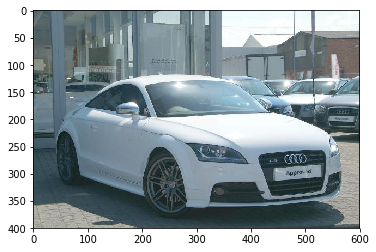

In [73]:
image = mpimg.imread("data/cars_train/00001.jpg")

plt.imshow(image)
plt.show()

In [ ]:
def get_label(annotations_path):
    
    car_annotations = loadmat(annotation)
    print(car_annotations)
    
    for idx, val in enumerate(car_annotations["annotation"][0]):
        print(val)
    
get_labels("data/devkit/cars_train_annos.mat")

In [4]:
car_annotations = loadmat("data/devkit/cars_train_annos.mat")

In [14]:
cars_meta  = loadmat("data/devkit/cars_meta.mat")

In [44]:
cars_meta["class_names"][0][1]

array(['Acura RL Sedan 2012'], dtype='<U19')

In [47]:
class_names = [car[0] for car in cars_meta["class_names"][0]]

In [50]:
class_names[90]

'Dodge Dakota Club Cab 2007'

In [12]:
car_annotations

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
         ...,
         (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
         (array([[78]], dtype=uint8), array([[526]], dtype=uint16), 

In [63]:
class_names[196]

IndexError: list index out of range

00001.jpg
[[14]]
13
Audi TTS Coupe 2012
00002.jpg
[[3]]
2
Acura TL Sedan 2012
00003.jpg
[[91]]
90
Dodge Dakota Club Cab 2007
00004.jpg
[[134]]
133
Hyundai Sonata Hybrid Sedan 2012
00005.jpg
[[106]]
105
Ford F-450 Super Duty Crew Cab 2012
00006.jpg
[[123]]
122
Geo Metro Convertible 1993
00007.jpg
[[89]]
88
Dodge Journey SUV 2012
00008.jpg
[[96]]
95
Dodge Charger Sedan 2012
00009.jpg
[[167]]
166
Mitsubishi Lancer Sedan 2012
00010.jpg
[[58]]
57
Chevrolet Traverse SUV 2012
00011.jpg
[[49]]
48
Buick Verano Sedan 2012
00012.jpg
[[186]]
185
Toyota Sequoia SUV 2012
00013.jpg
[[135]]
134
Hyundai Elantra Sedan 2007
00014.jpg
[[85]]
84
Dodge Caravan Minivan 1997
00015.jpg
[[193]]
192
Volvo C30 Hatchback 2012
00016.jpg
[[172]]
171
Plymouth Neon Coupe 1999
00017.jpg
[[14]]
13
Audi TTS Coupe 2012
00018.jpg
[[73]]
72
Chevrolet Malibu Sedan 2007
00019.jpg
[[192]]
191
Volkswagen Beetle Hatchback 2012
00020.jpg
[[57]]
56
Chevrolet Corvette Ron Fellows Edition Z06 2007
00021.jpg
[[79]]
78
Chrysler 300 SR

Mercedes-Benz C-Class Sedan 2012
00560.jpg
[[107]]
106
Ford Mustang Convertible 2007
00561.jpg
[[21]]
20
Audi S5 Convertible 2012
00562.jpg
[[59]]
58
Chevrolet Camaro Convertible 2012
00563.jpg
[[130]]
129
Hyundai Veloster Hatchback 2012
00564.jpg
[[72]]
71
Chevrolet Monte Carlo Coupe 2007
00565.jpg
[[183]]
182
Suzuki SX4 Hatchback 2012
00566.jpg
[[29]]
28
BMW 3 Series Sedan 2012
00567.jpg
[[92]]
91
Dodge Magnum Wagon 2008
00568.jpg
[[138]]
137
Hyundai Sonata Sedan 2012
00569.jpg
[[58]]
57
Chevrolet Traverse SUV 2012
00570.jpg
[[125]]
124
HUMMER H2 SUT Crew Cab 2009
00571.jpg
[[131]]
130
Hyundai Santa Fe SUV 2012
00572.jpg
[[183]]
182
Suzuki SX4 Hatchback 2012
00573.jpg
[[170]]
169
Nissan Juke Hatchback 2012
00574.jpg
[[82]]
81
Daewoo Nubira Wagon 2002
00575.jpg
[[121]]
120
GMC Acadia SUV 2012
00576.jpg
[[119]]
118
GMC Savana Van 2012
00577.jpg
[[71]]
70
Chevrolet Express Van 2007
00578.jpg
[[12]]
11
Audi RS 4 Convertible 2008
00579.jpg
[[33]]
32
BMW X6 SUV 2012
00580.jpg
[[191]]
190
V

BMW 3 Series Sedan 2012
01116.jpg
[[55]]
54
Chevrolet Corvette Convertible 2012
01117.jpg
[[109]]
108
Ford Expedition EL SUV 2009
01118.jpg
[[118]]
117
GMC Terrain SUV 2012
01119.jpg
[[144]]
143
Jaguar XK XKR 2012
01120.jpg
[[187]]
186
Toyota Camry Sedan 2012
01121.jpg
[[191]]
190
Volkswagen Golf Hatchback 1991
01122.jpg
[[34]]
33
BMW M3 Coupe 2012
01123.jpg
[[20]]
19
Audi S6 Sedan 2011
01124.jpg
[[11]]
10
Aston Martin Virage Coupe 2012
01125.jpg
[[54]]
53
Chevrolet Silverado 1500 Hybrid Crew Cab 2012
01126.jpg
[[45]]
44
Bugatti Veyron 16.4 Convertible 2009
01127.jpg
[[29]]
28
BMW 3 Series Sedan 2012
01128.jpg
[[30]]
29
BMW 3 Series Wagon 2012
01129.jpg
[[31]]
30
BMW 6 Series Convertible 2007
01130.jpg
[[43]]
42
Bentley Continental GT Coupe 2007
01131.jpg
[[113]]
112
Ford F-150 Regular Cab 2012
01132.jpg
[[143]]
142
Isuzu Ascender SUV 2008
01133.jpg
[[56]]
55
Chevrolet Corvette ZR1 2012
01134.jpg
[[5]]
4
Acura TSX Sedan 2012
01135.jpg
[[123]]
122
Geo Metro Convertible 1993
01136.jpg
[[

[[138]]
137
Hyundai Sonata Sedan 2012
01666.jpg
[[152]]
151
Lamborghini Gallardo LP 570-4 Superleggera 2012
01667.jpg
[[146]]
145
Jeep Wrangler SUV 2012
01668.jpg
[[119]]
118
GMC Savana Van 2012
01669.jpg
[[133]]
132
Hyundai Veracruz SUV 2012
01670.jpg
[[190]]
189
Volkswagen Golf Hatchback 2012
01671.jpg
[[47]]
46
Buick Regal GS 2012
01672.jpg
[[33]]
32
BMW X6 SUV 2012
01673.jpg
[[81]]
80
Chrysler PT Cruiser Convertible 2008
01674.jpg
[[167]]
166
Mitsubishi Lancer Sedan 2012
01675.jpg
[[35]]
34
BMW M5 Sedan 2010
01676.jpg
[[98]]
97
Eagle Talon Hatchback 1998
01677.jpg
[[44]]
43
Bentley Continental Flying Spur Sedan 2007
01678.jpg
[[10]]
9
Aston Martin Virage Convertible 2012
01679.jpg
[[64]]
63
Chevrolet Express Cargo Van 2007
01680.jpg
[[9]]
8
Aston Martin V8 Vantage Coupe 2012
01681.jpg
[[33]]
32
BMW X6 SUV 2012
01682.jpg
[[83]]
82
Dodge Caliber Wagon 2012
01683.jpg
[[86]]
85
Dodge Ram Pickup 3500 Crew Cab 2010
01684.jpg
[[151]]
150
Lamborghini Aventador Coupe 2012
01685.jpg
[[93]]
9

[[178]]
177
Scion xD Hatchback 2012
02250.jpg
[[188]]
187
Toyota Corolla Sedan 2012
02251.jpg
[[92]]
91
Dodge Magnum Wagon 2008
02252.jpg
[[162]]
161
Mercedes-Benz C-Class Sedan 2012
02253.jpg
[[21]]
20
Audi S5 Convertible 2012
02254.jpg
[[124]]
123
HUMMER H3T Crew Cab 2010
02255.jpg
[[181]]
180
Suzuki Aerio Sedan 2007
02256.jpg
[[22]]
21
Audi S5 Coupe 2012
02257.jpg
[[57]]
56
Chevrolet Corvette Ron Fellows Edition Z06 2007
02258.jpg
[[26]]
25
BMW ActiveHybrid 5 Sedan 2012
02259.jpg
[[44]]
43
Bentley Continental Flying Spur Sedan 2007
02260.jpg
[[40]]
39
Bentley Arnage Sedan 2009
02261.jpg
[[185]]
184
Tesla Model S Sedan 2012
02262.jpg
[[193]]
192
Volvo C30 Hatchback 2012
02263.jpg
[[177]]
176
Rolls-Royce Phantom Sedan 2012
02264.jpg
[[21]]
20
Audi S5 Convertible 2012
02265.jpg
[[75]]
74
Chevrolet Silverado 1500 Regular Cab 2012
02266.jpg
[[52]]
51
Cadillac SRX SUV 2012
02267.jpg
[[19]]
18
Audi TT Hatchback 2011
02268.jpg
[[71]]
70
Chevrolet Express Van 2007
02269.jpg
[[95]]
94
Dodge D

02790.jpg
[[90]]
89
Dodge Dakota Crew Cab 2010
02791.jpg
[[21]]
20
Audi S5 Convertible 2012
02792.jpg
[[54]]
53
Chevrolet Silverado 1500 Hybrid Crew Cab 2012
02793.jpg
[[124]]
123
HUMMER H3T Crew Cab 2010
02794.jpg
[[49]]
48
Buick Verano Sedan 2012
02795.jpg
[[58]]
57
Chevrolet Traverse SUV 2012
02796.jpg
[[18]]
17
Audi 100 Wagon 1994
02797.jpg
[[12]]
11
Audi RS 4 Convertible 2008
02798.jpg
[[49]]
48
Buick Verano Sedan 2012
02799.jpg
[[157]]
156
MINI Cooper Roadster Convertible 2012
02800.jpg
[[23]]
22
Audi S4 Sedan 2012
02801.jpg
[[49]]
48
Buick Verano Sedan 2012
02802.jpg
[[179]]
178
Spyker C8 Convertible 2009
02803.jpg
[[150]]
149
Lamborghini Reventon Coupe 2008
02804.jpg
[[61]]
60
Chevrolet Impala Sedan 2007
02805.jpg
[[113]]
112
Ford F-150 Regular Cab 2012
02806.jpg
[[153]]
152
Lamborghini Diablo Coupe 2001
02807.jpg
[[184]]
183
Suzuki SX4 Sedan 2012
02808.jpg
[[75]]
74
Chevrolet Silverado 1500 Regular Cab 2012
02809.jpg
[[36]]
35
BMW M6 Convertible 2010
02810.jpg
[[115]]
114
Ford

Honda Odyssey Minivan 2007
03333.jpg
[[177]]
176
Rolls-Royce Phantom Sedan 2012
03334.jpg
[[172]]
171
Plymouth Neon Coupe 1999
03335.jpg
[[42]]
41
Bentley Continental GT Coupe 2012
03336.jpg
[[85]]
84
Dodge Caravan Minivan 1997
03337.jpg
[[186]]
185
Toyota Sequoia SUV 2012
03338.jpg
[[167]]
166
Mitsubishi Lancer Sedan 2012
03339.jpg
[[37]]
36
BMW X3 SUV 2012
03340.jpg
[[96]]
95
Dodge Charger Sedan 2012
03341.jpg
[[196]]
195
smart fortwo Convertible 2012
03342.jpg
[[51]]
50
Cadillac CTS-V Sedan 2012
03343.jpg
[[73]]
72
Chevrolet Malibu Sedan 2007
03344.jpg
[[20]]
19
Audi S6 Sedan 2011
03345.jpg
[[194]]
193
Volvo 240 Sedan 1993
03346.jpg
[[168]]
167
Nissan Leaf Hatchback 2012
03347.jpg
[[38]]
37
BMW Z4 Convertible 2012
03348.jpg
[[121]]
120
GMC Acadia SUV 2012
03349.jpg
[[25]]
24
Audi TT RS Coupe 2012
03350.jpg
[[104]]
103
Ferrari 458 Italia Coupe 2012
03351.jpg
[[63]]
62
Chevrolet Sonic Sedan 2012
03352.jpg
[[67]]
66
Chevrolet Malibu Hybrid Sedan 2010
03353.jpg
[[49]]
48
Buick Verano Se

Rolls-Royce Ghost Sedan 2012
03915.jpg
[[128]]
127
Honda Accord Coupe 2012
03916.jpg
[[186]]
185
Toyota Sequoia SUV 2012
03917.jpg
[[133]]
132
Hyundai Veracruz SUV 2012
03918.jpg
[[61]]
60
Chevrolet Impala Sedan 2007
03919.jpg
[[183]]
182
Suzuki SX4 Hatchback 2012
03920.jpg
[[94]]
93
Dodge Durango SUV 2012
03921.jpg
[[149]]
148
Jeep Compass SUV 2012
03922.jpg
[[190]]
189
Volkswagen Golf Hatchback 2012
03923.jpg
[[48]]
47
Buick Rainier SUV 2007
03924.jpg
[[122]]
121
GMC Canyon Extended Cab 2012
03925.jpg
[[53]]
52
Cadillac Escalade EXT Crew Cab 2007
03926.jpg
[[143]]
142
Isuzu Ascender SUV 2008
03927.jpg
[[159]]
158
Mazda Tribute SUV 2011
03928.jpg
[[41]]
40
Bentley Mulsanne Sedan 2011
03929.jpg
[[101]]
100
Ferrari FF Coupe 2012
03930.jpg
[[190]]
189
Volkswagen Golf Hatchback 2012
03931.jpg
[[167]]
166
Mitsubishi Lancer Sedan 2012
03932.jpg
[[49]]
48
Buick Verano Sedan 2012
03933.jpg
[[60]]
59
Chevrolet HHR SS 2010
03934.jpg
[[73]]
72
Chevrolet Malibu Sedan 2007
03935.jpg
[[32]]
31
BMW 

[[5]]
4
Acura TSX Sedan 2012
04485.jpg
[[97]]
96
Dodge Charger SRT-8 2009
04486.jpg
[[2]]
1
Acura RL Sedan 2012
04487.jpg
[[38]]
37
BMW Z4 Convertible 2012
04488.jpg
[[175]]
174
Rolls-Royce Phantom Drophead Coupe Convertible 2012
04489.jpg
[[82]]
81
Daewoo Nubira Wagon 2002
04490.jpg
[[173]]
172
Porsche Panamera Sedan 2012
04491.jpg
[[140]]
139
Hyundai Azera Sedan 2012
04492.jpg
[[141]]
140
Infiniti G Coupe IPL 2012
04493.jpg
[[8]]
7
Aston Martin V8 Vantage Convertible 2012
04494.jpg
[[9]]
8
Aston Martin V8 Vantage Coupe 2012
04495.jpg
[[8]]
7
Aston Martin V8 Vantage Convertible 2012
04496.jpg
[[112]]
111
Ford GT Coupe 2006
04497.jpg
[[12]]
11
Audi RS 4 Convertible 2008
04498.jpg
[[178]]
177
Scion xD Hatchback 2012
04499.jpg
[[132]]
131
Hyundai Tucson SUV 2012
04500.jpg
[[29]]
28
BMW 3 Series Sedan 2012
04501.jpg
[[186]]
185
Toyota Sequoia SUV 2012
04502.jpg
[[66]]
65
Chevrolet Cobalt SS 2010
04503.jpg
[[130]]
129
Hyundai Veloster Hatchback 2012
04504.jpg
[[122]]
121
GMC Canyon Extende

177
Scion xD Hatchback 2012
05040.jpg
[[25]]
24
Audi TT RS Coupe 2012
05041.jpg
[[88]]
87
Dodge Sprinter Cargo Van 2009
05042.jpg
[[6]]
5
Acura Integra Type R 2001
05043.jpg
[[190]]
189
Volkswagen Golf Hatchback 2012
05044.jpg
[[131]]
130
Hyundai Santa Fe SUV 2012
05045.jpg
[[192]]
191
Volkswagen Beetle Hatchback 2012
05046.jpg
[[90]]
89
Dodge Dakota Crew Cab 2010
05047.jpg
[[155]]
154
Land Rover LR2 SUV 2012
05048.jpg
[[10]]
9
Aston Martin Virage Convertible 2012
05049.jpg
[[46]]
45
Bugatti Veyron 16.4 Coupe 2009
05050.jpg
[[23]]
22
Audi S4 Sedan 2012
05051.jpg
[[100]]
99
FIAT 500 Convertible 2012
05052.jpg
[[3]]
2
Acura TL Sedan 2012
05053.jpg
[[180]]
179
Spyker C8 Coupe 2009
05054.jpg
[[52]]
51
Cadillac SRX SUV 2012
05055.jpg
[[165]]
164
Mercedes-Benz S-Class Sedan 2012
05056.jpg
[[97]]
96
Dodge Charger SRT-8 2009
05057.jpg
[[4]]
3
Acura TL Type-S 2008
05058.jpg
[[33]]
32
BMW X6 SUV 2012
05059.jpg
[[104]]
103
Ferrari 458 Italia Coupe 2012
05060.jpg
[[132]]
131
Hyundai Tucson SUV 201

80
Chrysler PT Cruiser Convertible 2008
05659.jpg
[[101]]
100
Ferrari FF Coupe 2012
05660.jpg
[[56]]
55
Chevrolet Corvette ZR1 2012
05661.jpg
[[154]]
153
Land Rover Range Rover SUV 2012
05662.jpg
[[96]]
95
Dodge Charger Sedan 2012
05663.jpg
[[116]]
115
Ford E-Series Wagon Van 2012
05664.jpg
[[119]]
118
GMC Savana Van 2012
05665.jpg
[[82]]
81
Daewoo Nubira Wagon 2002
05666.jpg
[[185]]
184
Tesla Model S Sedan 2012
05667.jpg
[[81]]
80
Chrysler PT Cruiser Convertible 2008
05668.jpg
[[104]]
103
Ferrari 458 Italia Coupe 2012
05669.jpg
[[105]]
104
Fisker Karma Sedan 2012
05670.jpg
[[43]]
42
Bentley Continental GT Coupe 2007
05671.jpg
[[6]]
5
Acura Integra Type R 2001
05672.jpg
[[58]]
57
Chevrolet Traverse SUV 2012
05673.jpg
[[173]]
172
Porsche Panamera Sedan 2012
05674.jpg
[[22]]
21
Audi S5 Coupe 2012
05675.jpg
[[151]]
150
Lamborghini Aventador Coupe 2012
05676.jpg
[[141]]
140
Infiniti G Coupe IPL 2012
05677.jpg
[[166]]
165
Mercedes-Benz Sprinter Van 2012
05678.jpg
[[169]]
168
Nissan NV Passe

[[128]]
127
Honda Accord Coupe 2012
06220.jpg
[[82]]
81
Daewoo Nubira Wagon 2002
06221.jpg
[[104]]
103
Ferrari 458 Italia Coupe 2012
06222.jpg
[[43]]
42
Bentley Continental GT Coupe 2007
06223.jpg
[[117]]
116
Ford Fiesta Sedan 2012
06224.jpg
[[17]]
16
Audi 100 Sedan 1994
06225.jpg
[[47]]
46
Buick Regal GS 2012
06226.jpg
[[36]]
35
BMW M6 Convertible 2010
06227.jpg
[[14]]
13
Audi TTS Coupe 2012
06228.jpg
[[106]]
105
Ford F-450 Super Duty Crew Cab 2012
06229.jpg
[[23]]
22
Audi S4 Sedan 2012
06230.jpg
[[21]]
20
Audi S5 Convertible 2012
06231.jpg
[[78]]
77
Chrysler Town and Country Minivan 2012
06232.jpg
[[163]]
162
Mercedes-Benz SL-Class Coupe 2009
06233.jpg
[[41]]
40
Bentley Mulsanne Sedan 2011
06234.jpg
[[34]]
33
BMW M3 Coupe 2012
06235.jpg
[[182]]
181
Suzuki Kizashi Sedan 2012
06236.jpg
[[23]]
22
Audi S4 Sedan 2012
06237.jpg
[[105]]
104
Fisker Karma Sedan 2012
06238.jpg
[[144]]
143
Jaguar XK XKR 2012
06239.jpg
[[10]]
9
Aston Martin Virage Convertible 2012
06240.jpg
[[179]]
178
Spyker C8

[[143]]
142
Isuzu Ascender SUV 2008
06790.jpg
[[82]]
81
Daewoo Nubira Wagon 2002
06791.jpg
[[167]]
166
Mitsubishi Lancer Sedan 2012
06792.jpg
[[39]]
38
Bentley Continental Supersports Conv. Convertible 2012
06793.jpg
[[21]]
20
Audi S5 Convertible 2012
06794.jpg
[[47]]
46
Buick Regal GS 2012
06795.jpg
[[156]]
155
Lincoln Town Car Sedan 2011
06796.jpg
[[90]]
89
Dodge Dakota Crew Cab 2010
06797.jpg
[[146]]
145
Jeep Wrangler SUV 2012
06798.jpg
[[99]]
98
FIAT 500 Abarth 2012
06799.jpg
[[112]]
111
Ford GT Coupe 2006
06800.jpg
[[42]]
41
Bentley Continental GT Coupe 2012
06801.jpg
[[59]]
58
Chevrolet Camaro Convertible 2012
06802.jpg
[[67]]
66
Chevrolet Malibu Hybrid Sedan 2010
06803.jpg
[[89]]
88
Dodge Journey SUV 2012
06804.jpg
[[85]]
84
Dodge Caravan Minivan 1997
06805.jpg
[[143]]
142
Isuzu Ascender SUV 2008
06806.jpg
[[126]]
125
Honda Odyssey Minivan 2012
06807.jpg
[[61]]
60
Chevrolet Impala Sedan 2007
06808.jpg
[[149]]
148
Jeep Compass SUV 2012
06809.jpg
[[106]]
105
Ford F-450 Super Duty 

07289.jpg
[[168]]
167
Nissan Leaf Hatchback 2012
07290.jpg
[[1]]
0
AM General Hummer SUV 2000
07291.jpg
[[99]]
98
FIAT 500 Abarth 2012
07292.jpg
[[33]]
32
BMW X6 SUV 2012
07293.jpg
[[147]]
146
Jeep Liberty SUV 2012
07294.jpg
[[146]]
145
Jeep Wrangler SUV 2012
07295.jpg
[[23]]
22
Audi S4 Sedan 2012
07296.jpg
[[45]]
44
Bugatti Veyron 16.4 Convertible 2009
07297.jpg
[[89]]
88
Dodge Journey SUV 2012
07298.jpg
[[117]]
116
Ford Fiesta Sedan 2012
07299.jpg
[[132]]
131
Hyundai Tucson SUV 2012
07300.jpg
[[122]]
121
GMC Canyon Extended Cab 2012
07301.jpg
[[183]]
182
Suzuki SX4 Hatchback 2012
07302.jpg
[[63]]
62
Chevrolet Sonic Sedan 2012
07303.jpg
[[125]]
124
HUMMER H2 SUT Crew Cab 2009
07304.jpg
[[180]]
179
Spyker C8 Coupe 2009
07305.jpg
[[176]]
175
Rolls-Royce Ghost Sedan 2012
07306.jpg
[[178]]
177
Scion xD Hatchback 2012
07307.jpg
[[12]]
11
Audi RS 4 Convertible 2008
07308.jpg
[[32]]
31
BMW X5 SUV 2007
07309.jpg
[[142]]
141
Infiniti QX56 SUV 2011
07310.jpg
[[80]]
79
Chrysler Crossfire Convert

[[147]]
146
Jeep Liberty SUV 2012
07903.jpg
[[159]]
158
Mazda Tribute SUV 2011
07904.jpg
[[74]]
73
Chevrolet Silverado 1500 Extended Cab 2012
07905.jpg
[[107]]
106
Ford Mustang Convertible 2007
07906.jpg
[[119]]
118
GMC Savana Van 2012
07907.jpg
[[68]]
67
Chevrolet TrailBlazer SS 2009
07908.jpg
[[49]]
48
Buick Verano Sedan 2012
07909.jpg
[[100]]
99
FIAT 500 Convertible 2012
07910.jpg
[[51]]
50
Cadillac CTS-V Sedan 2012
07911.jpg
[[74]]
73
Chevrolet Silverado 1500 Extended Cab 2012
07912.jpg
[[96]]
95
Dodge Charger Sedan 2012
07913.jpg
[[81]]
80
Chrysler PT Cruiser Convertible 2008
07914.jpg
[[161]]
160
Mercedes-Benz 300-Class Convertible 1993
07915.jpg
[[136]]
135
Hyundai Accent Sedan 2012
07916.jpg
[[4]]
3
Acura TL Type-S 2008
07917.jpg
[[188]]
187
Toyota Corolla Sedan 2012
07918.jpg
[[116]]
115
Ford E-Series Wagon Van 2012
07919.jpg
[[171]]
170
Nissan 240SX Coupe 1998
07920.jpg
[[141]]
140
Infiniti G Coupe IPL 2012
07921.jpg
[[47]]
46
Buick Regal GS 2012
07922.jpg
[[34]]
33
BMW M3 Co

In [ ]:
def get_labels():
    annos = loadmat('data/devkit/cars_train_annos.mat')
    _, total_size = annos["annotations"].shape
    print("total sample size is ", total_size)
    labels = np.zeros((total_size, 5))
    for i in range(total_size):
        print(annos["annotations"][:,i])
        path = annos["annotations"][:,i][0][0][0].split(".")
        id = int(path[0][8:]) - 1
        for j in range(5):
            labels[id, j] = int(annos["annotations"][:,i][0][j + 1][0])
    return labels
labels = get_labels()

In [ ]:
cars_meta

In [ ]:
print(os.listdir("./data"))

In [ ]:
cars_train_annotation = loadmat("data/devkit/cars_train_annos.mat")

In [ ]:
eval_train  = loadmat("data/devkit/eval_train.m")

In [ ]:
len(cars_meta["class_names"][0])

In [ ]:
print(cars_meta["class_names"][0])

In [ ]:
for annotation in cars_train_annotation["annotations"][0]:
    print(annotation[-1])
    print(annotation[0])

In [ ]:

test = list()

for example in mat_train['annotations'][0]:
    print(len(example))
    print(example[1])
    image = example[-1][0]

    test.append(image)

In [ ]:
mat_train["annotations"][0]

In [ ]:
import os
# import car images from stanford cars
train_img_dir_s = "data/cars_train"
all_train_img_paths_s = [join(train_img_dir_s,filename) for filename in os.listdir(train_img_dir_s)]

# split cars data into train, test, and val
train_img_paths, test_img_paths_car = train_test_split(all_train_img_paths_s+train_img_paths_n, test_size=0.25, random_state=42)
train_img_paths, val_img_paths_car = train_test_split(train_img_paths, test_size=0.25, random_state=42)